First few rows of the filtered DataFrame:
    client_id  age           job   marital  education  account_id in_default  \
7     5561468   42  entrepreneur  divorced   tertiary           8        yes   
9     5203129   43    technician    single  secondary          10         no   
14    6633578   57      services   married  secondary          15         no   
30    9718018   57    technician   married  secondary          31         no   
33    1174906   59   blue-collar   married  secondary          34         no   

    balance housing loan  ... campaign_id  day  month duration  campaign  \
7       2.0     yes   no  ...           8    5    may      380         1   
9     593.0     yes   no  ...          10    5    may       55         1   
14    162.0     yes   no  ...          15    5    may      174         1   
30    839.0      no  yes  ...          31    5    may      225         1   
33      0.0     yes   no  ...          34    5    may      226         1   

    pdays  previous 

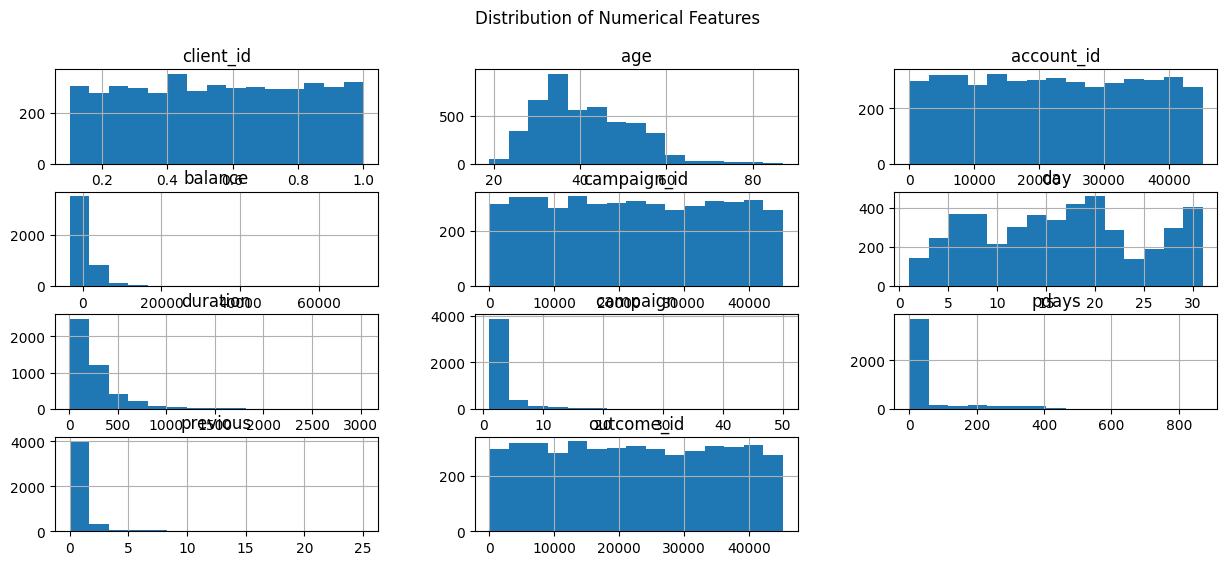

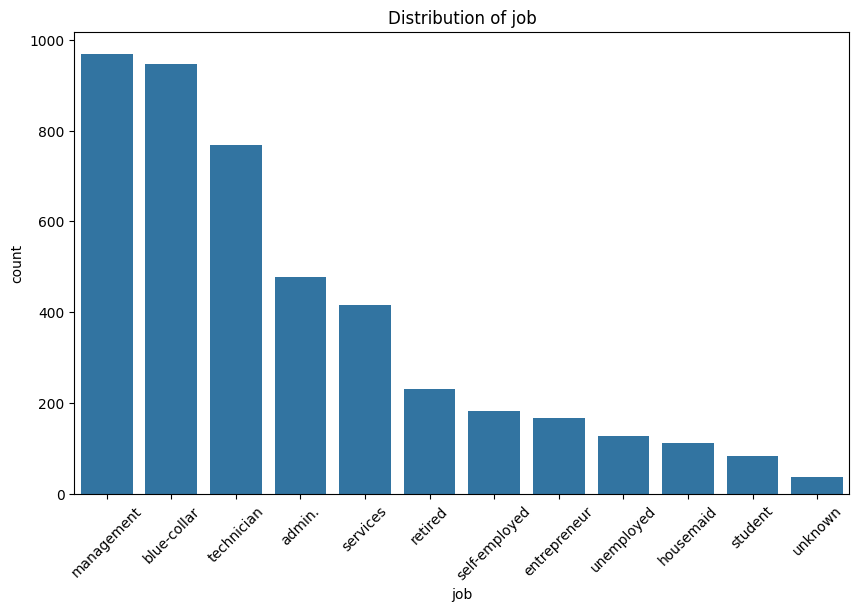

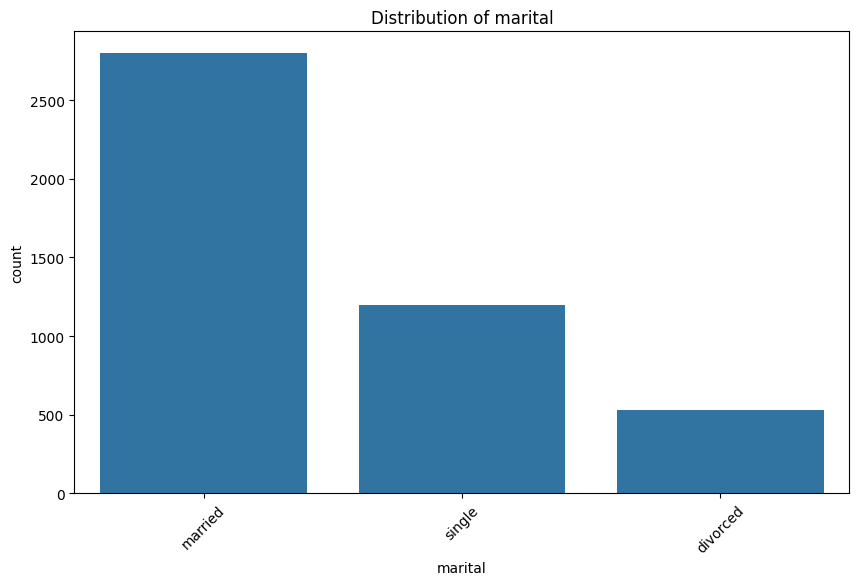

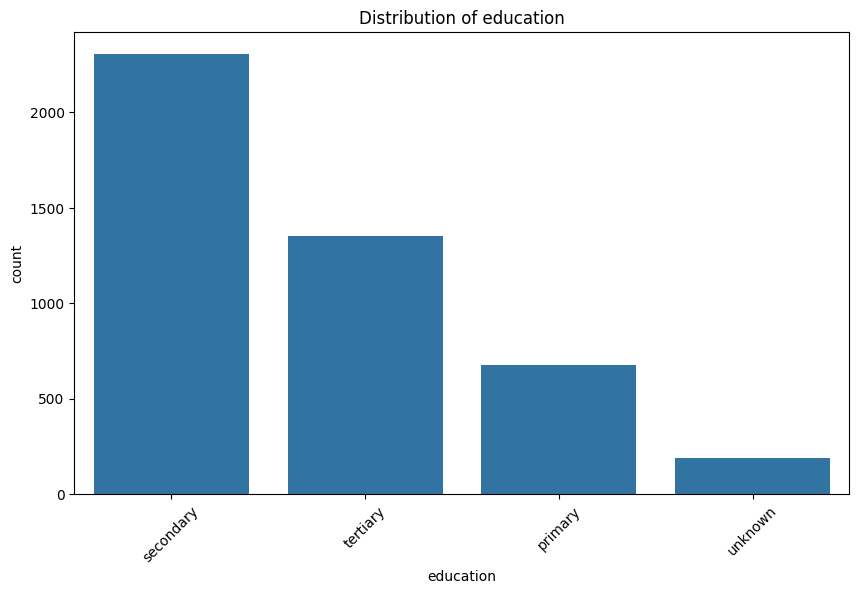

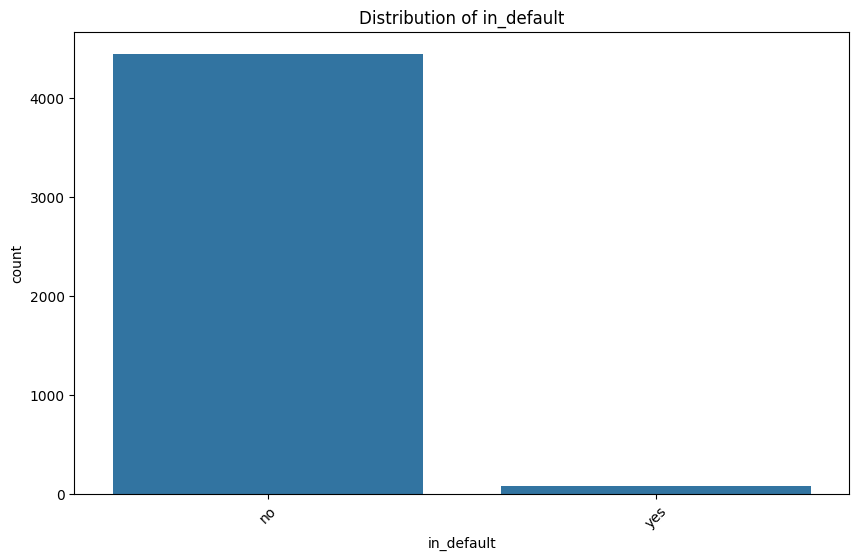

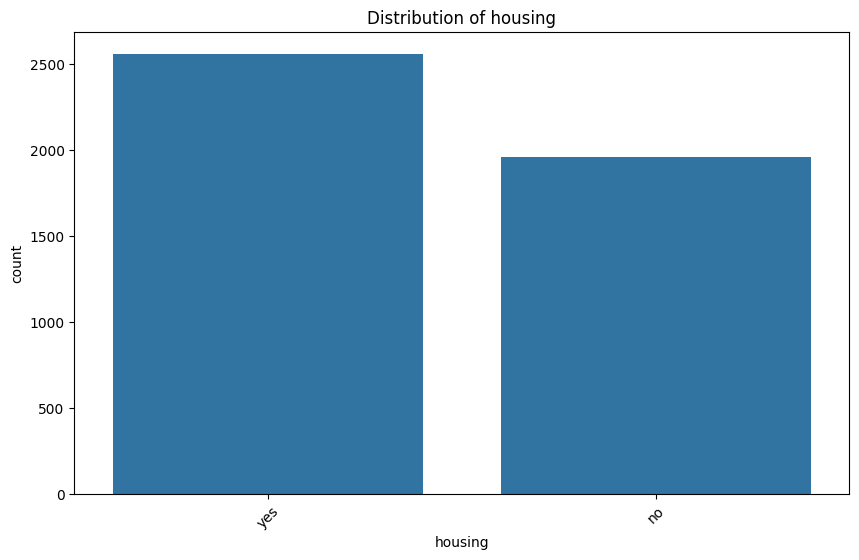

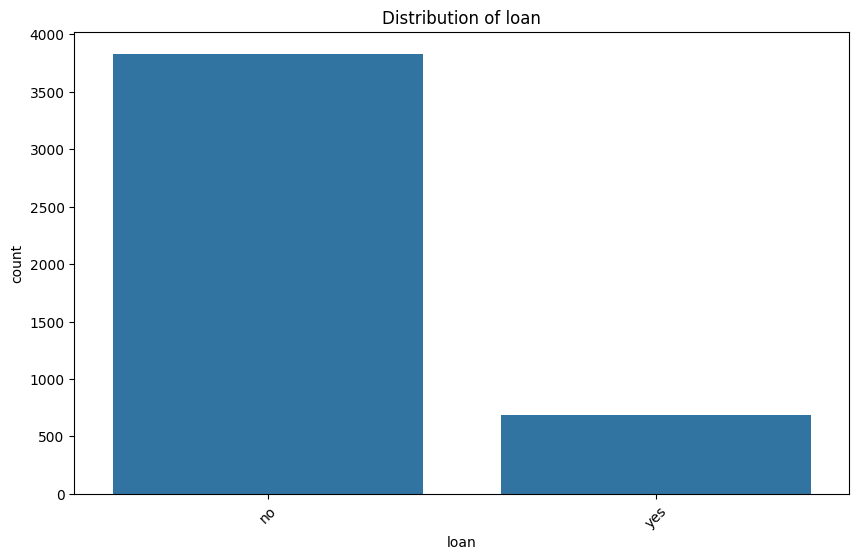

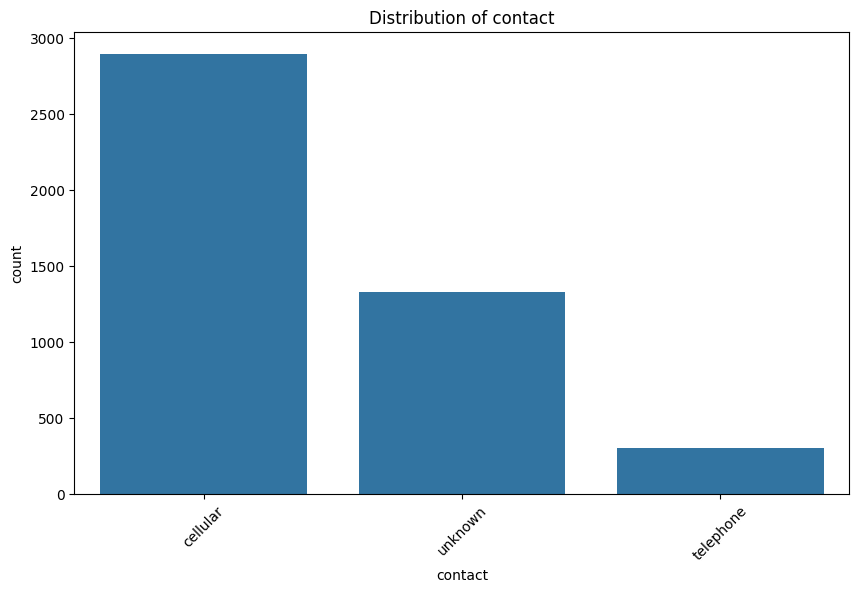

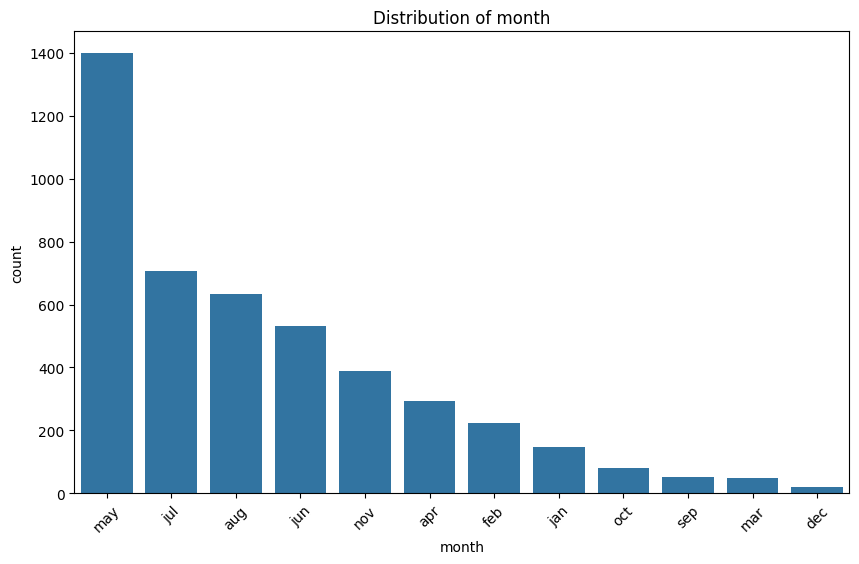

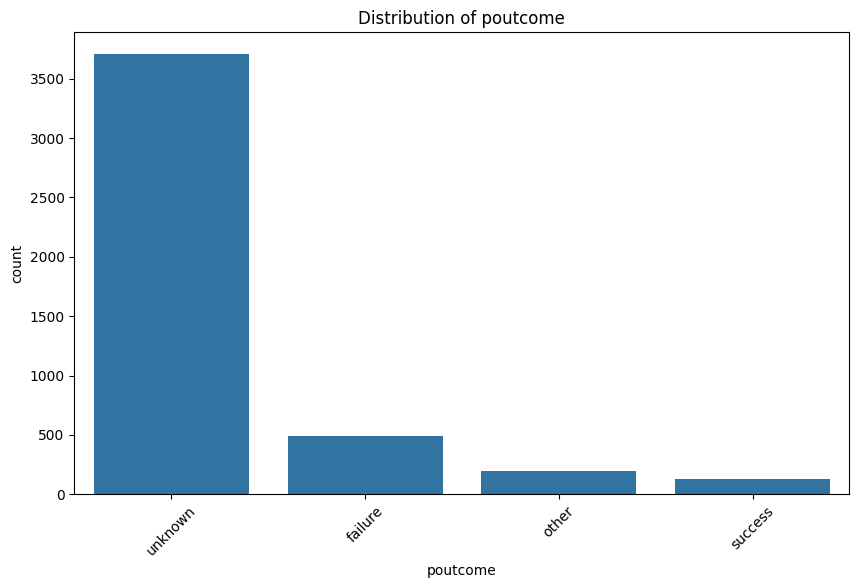

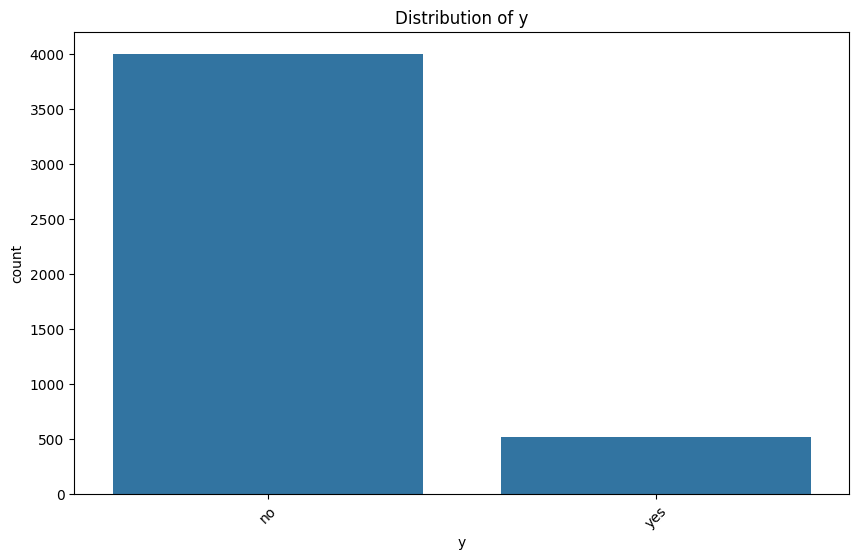

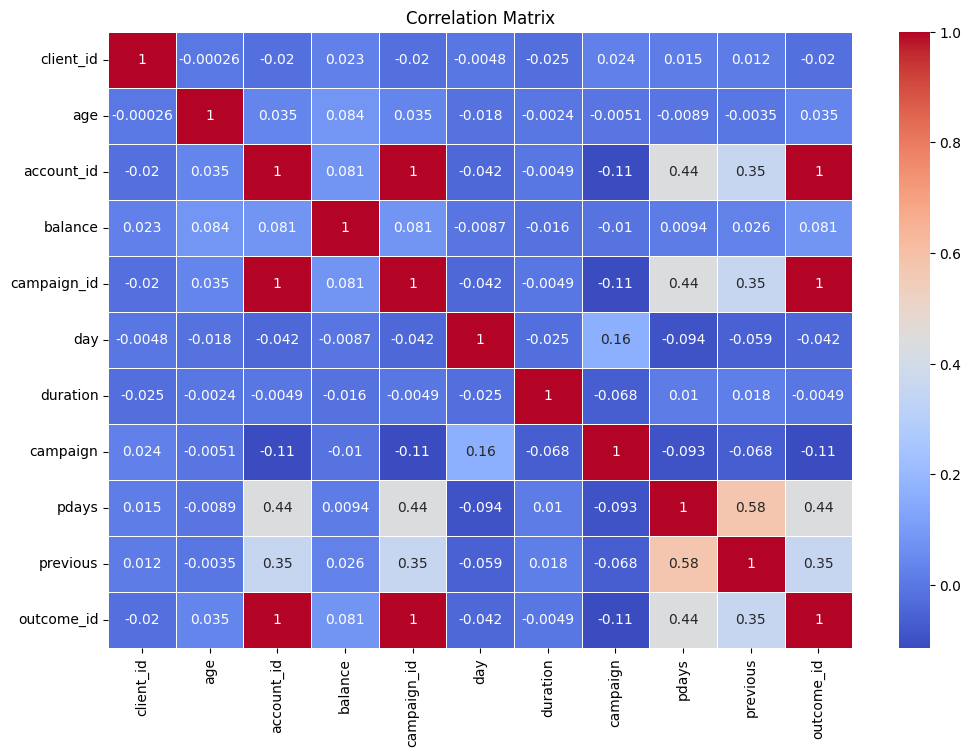

Correlation Matrix Table:
             client_id       age  account_id   balance  campaign_id       day  \
client_id     1.000000 -0.000263   -0.020217  0.022865    -0.020217 -0.004789   
age          -0.000263  1.000000    0.035240  0.083820     0.035240 -0.017853   
account_id   -0.020217  0.035240    1.000000  0.080607     1.000000 -0.041914   
balance       0.022865  0.083820    0.080607  1.000000     0.080607 -0.008677   
campaign_id  -0.020217  0.035240    1.000000  0.080607     1.000000 -0.041914   
day          -0.004789 -0.017853   -0.041914 -0.008677    -0.041914  1.000000   
duration     -0.024827 -0.002367   -0.004870 -0.015950    -0.004870 -0.024629   
campaign      0.023831 -0.005148   -0.113823 -0.009976    -0.113823  0.160706   
pdays         0.015019 -0.008894    0.436586  0.009437     0.436586 -0.094352   
previous      0.012078 -0.003511    0.353650  0.026196     0.353650 -0.059114   
outcome_id   -0.020217  0.035240    1.000000  0.080607     1.000000 -0.041914   

 

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

try:
    database_path = "data/data.db"
    conn = sqlite3.connect(database_path)
    query = open('data/fetch_all.sql', 'r').read()
    df = pd.read_sql_query(query, conn)
except (sqlite3.Error, FileNotFoundError) as e:
    print(f"An error occurred: {e}")
finally:
    if 'conn' in locals():
        conn.close()

# Filter only rows with 'yes' or 'no' in the 'y' column
df = df[df['y'].isin(['no', 'yes'])]

# Display the first few rows of the filtered DataFrame
print("First few rows of the filtered DataFrame:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display correlation matrix as a table
print("Correlation Matrix Table:")
print(correlation_matrix)

First few rows of the encoded DataFrame:
   client_id  age  account_id  balance  campaign_id  day  duration  campaign  \
0    5561468   42           8      2.0            8    5       380         1   
1    5203129   43          10    593.0           10    5        55         1   
2    6633578   57          15    162.0           15    5       174         1   
3    9718018   57          31    839.0           31    5       225         1   
4    1174906   59          34      0.0           34    5       226         1   

   pdays  previous  ...  month_jun  month_mar  month_may  month_nov  \
0     -1         0  ...        0.0        0.0        1.0        0.0   
1     -1         0  ...        0.0        0.0        1.0        0.0   
2     -1         0  ...        0.0        0.0        1.0        0.0   
3     -1         0  ...        0.0        0.0        1.0        0.0   
4     -1         0  ...        0.0        0.0        1.0        0.0   

   month_oct  month_sep  poutcome_other  poutcome_s

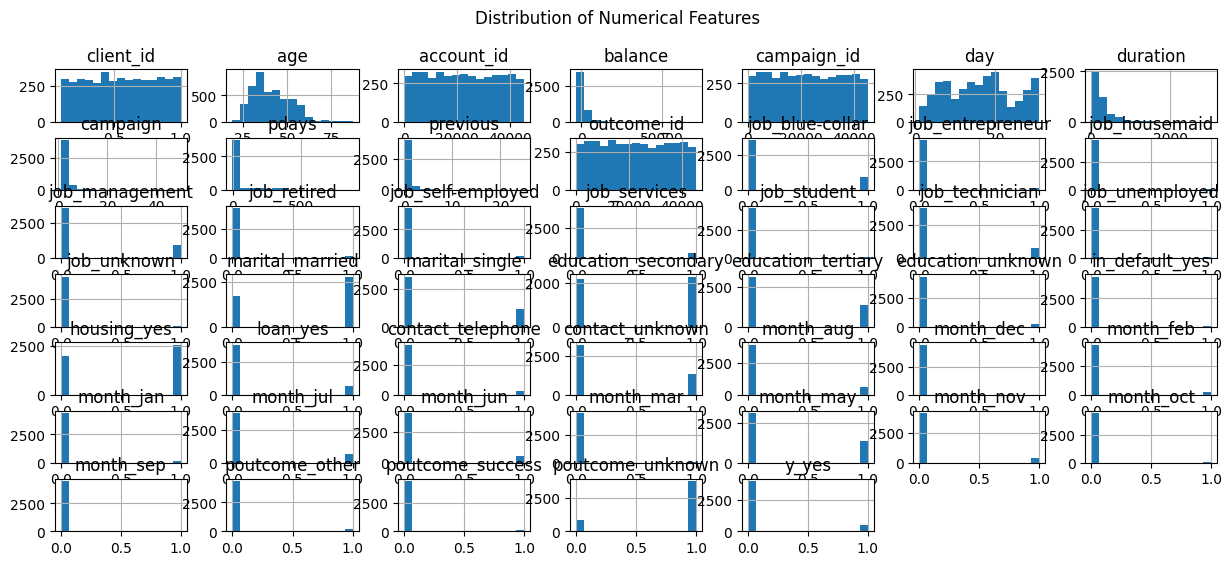

No categorical features found.


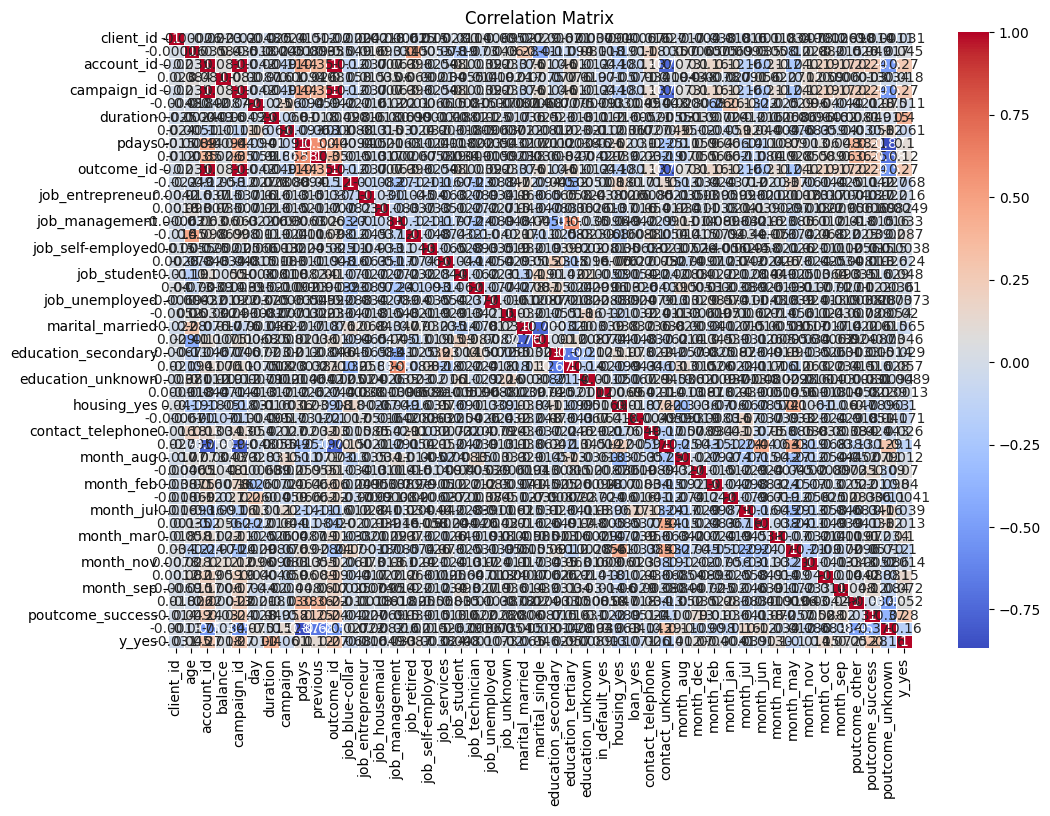

Correlation Matrix Table:
                     client_id       age  account_id   balance  campaign_id  \
client_id             1.000000 -0.000263   -0.020217  0.022865    -0.020217   
age                  -0.000263  1.000000    0.035240  0.083820     0.035240   
account_id           -0.020217  0.035240    1.000000  0.080607     1.000000   
balance               0.022865  0.083820    0.080607  1.000000     0.080607   
campaign_id          -0.020217  0.035240    1.000000  0.080607     1.000000   
day                  -0.004789 -0.017853   -0.041914 -0.008677    -0.041914   
duration             -0.024827 -0.002367   -0.004870 -0.015950    -0.004870   
campaign              0.023831 -0.005148   -0.113823 -0.009976    -0.113823   
pdays                 0.015019 -0.008894    0.436586  0.009437     0.436586   
previous              0.012078 -0.003511    0.353650  0.026196     0.353650   
outcome_id           -0.020217  0.035240    1.000000  0.080607     1.000000   
job_blue-collar      -0.02

In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
encoded_df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)

# Display the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(encoded_df.head())

# Distribution of numerical features
numerical_features = encoded_df.select_dtypes(include=['int64', 'float64']).columns
if not numerical_features.empty:
    encoded_df[numerical_features].hist(bins=15, figsize=(15, 6))
    plt.suptitle('Distribution of Numerical Features')
    plt.show()
else:
    print("No numerical features found.")

# Distribution of categorical features
categorical_features = encoded_df.select_dtypes(include=['object']).columns
if not categorical_features.empty:
    for feature in categorical_features:
        plt.figure(figsize=(10, 4)) 
        sns.countplot(data=df, x=feature)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical features found.")

# Correlation matrix
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display correlation matrix as a table
print("Correlation Matrix Table:")
print(correlation_matrix)
# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv', index=True)

   Principal Component 1  Principal Component 2
0              -3.298158               0.423281
1              -3.171890               1.781815
2              -3.511541               2.040781
3              -3.319121               1.046983
4              -3.553346               2.076589


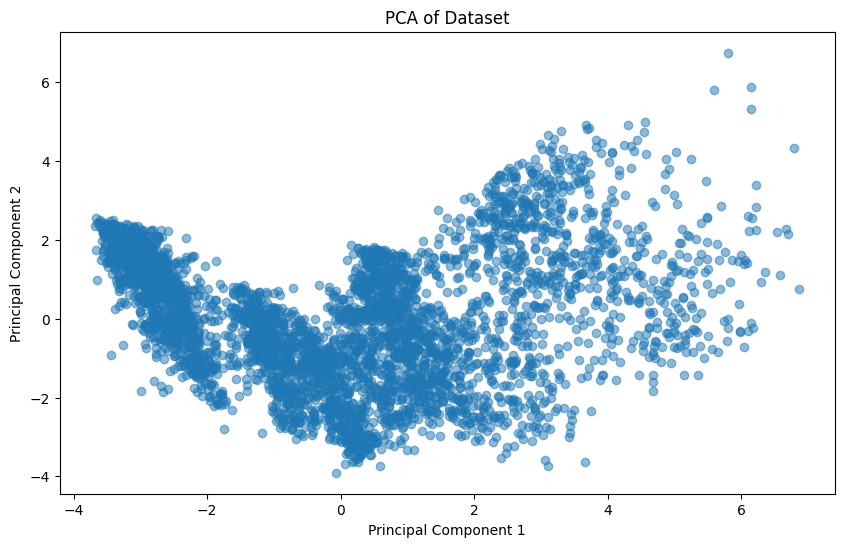

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(encoded_df)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
print(df_pca.head())

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()